In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
from google.colab import files
uploaded=files.upload()

Saving diabetes.csv to diabetes (3).csv


In [26]:
import io
data= pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# EXPLORATORY DATA ANALYSIS


In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
data.shape

(768, 9)

In [30]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [33]:
# Checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
#It seems there is no missing value, but it is not compatible
#We must define 0 values as NaN

data[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]] = data[["Pregnancies","Glucose","BloodPressure",
     "SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [11]:
print(data.isnull().sum()) # checking again missing values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


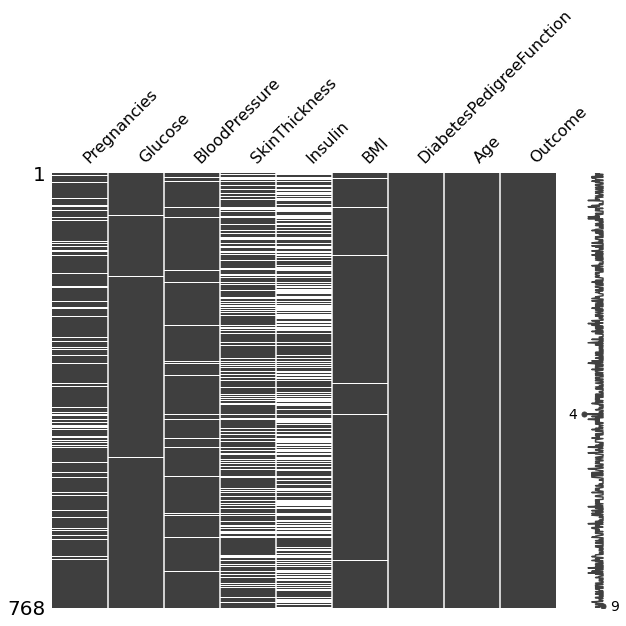

In [12]:
# Visualisations 
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(data,figsize=(10,8))
plt.show()

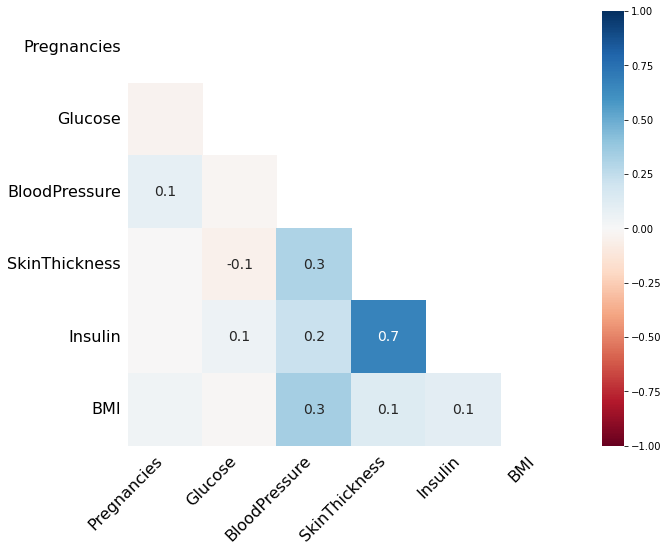

In [13]:
# Heat Map
msno.heatmap(data,figsize=(10,8))
plt.show()

In [35]:
# Let's add the class mean corresponding to that data instead of the NaN data.

print(data.groupby(["Outcome"])["Pregnancies"].median())
data["Pregnancies"].fillna(data.groupby(["Outcome"])["Pregnancies"].transform("median"),inplace=True)
print(data.groupby(["Outcome"])["Glucose"].median())
data["Glucose"].fillna(data.groupby(["Outcome"])["Glucose"].transform("median"),inplace=True)
print(data.groupby(["Outcome"])["BloodPressure"].median())
data["BloodPressure"].fillna(data.groupby(["Outcome"])["BloodPressure"].transform("median"),inplace=True)
print(data.groupby(["Outcome"])["SkinThickness"].median())
data["SkinThickness"].fillna(data.groupby(["Outcome"])["SkinThickness"].transform("median"),inplace=True)
print(data.groupby(["Outcome"])["Insulin"].median())
data["Insulin"].fillna(data.groupby(["Outcome"])["Insulin"].transform("median"),inplace=True)
print(data.groupby(["Outcome"])["BMI"].median())
data["BMI"].fillna(data.groupby(["Outcome"])["BMI"].transform("median"),inplace=True)

Outcome
0    3.0
1    5.0
Name: Pregnancies, dtype: float64
Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64
Outcome
0    70.0
1    74.5
Name: BloodPressure, dtype: float64
Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64
Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64
Outcome
0    30.1
1    34.3
Name: BMI, dtype: float64


In [20]:
print(data.isnull().sum()) # checking again missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [21]:
# Corelation
corrPearson = data.corr(method="pearson")
corrSpearman = data.corr(method="spearman")
# correlation types

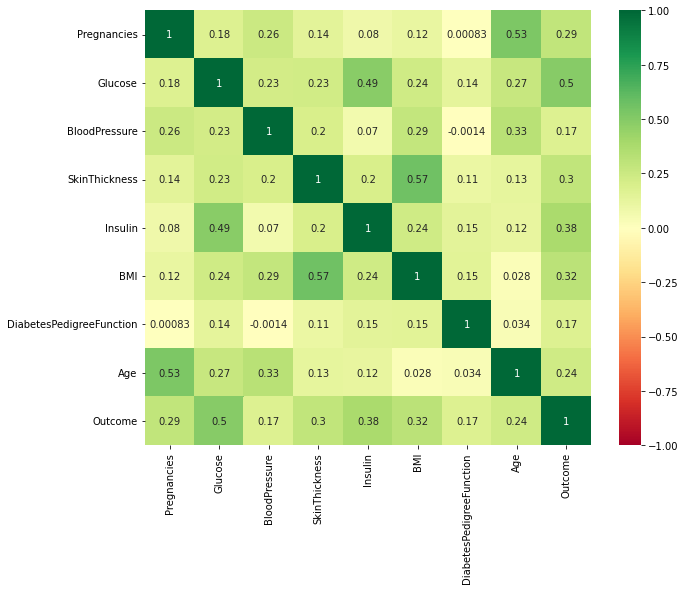

In [18]:
import seaborn as sns
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,cmap="RdYlGn",vmax=1,vmin=-1,center=0,annot=True)
plt.show()

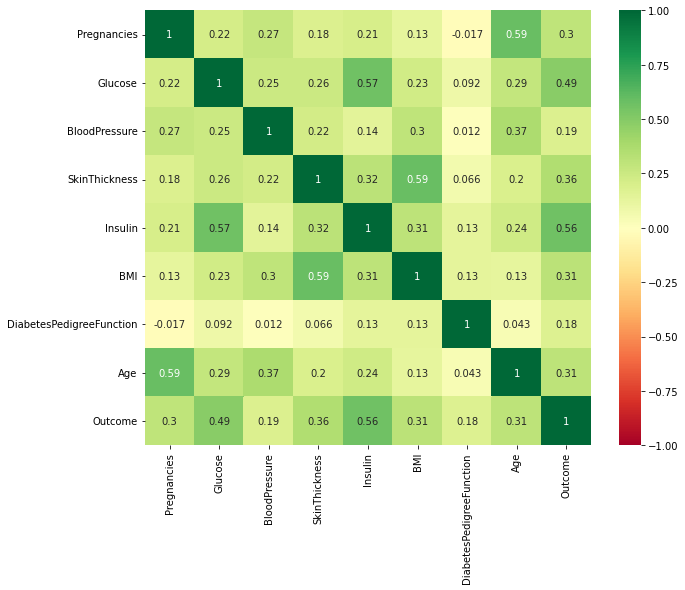

In [22]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,cmap="RdYlGn",vmax=1,vmin=-1,center=0,annot=True)
plt.show()

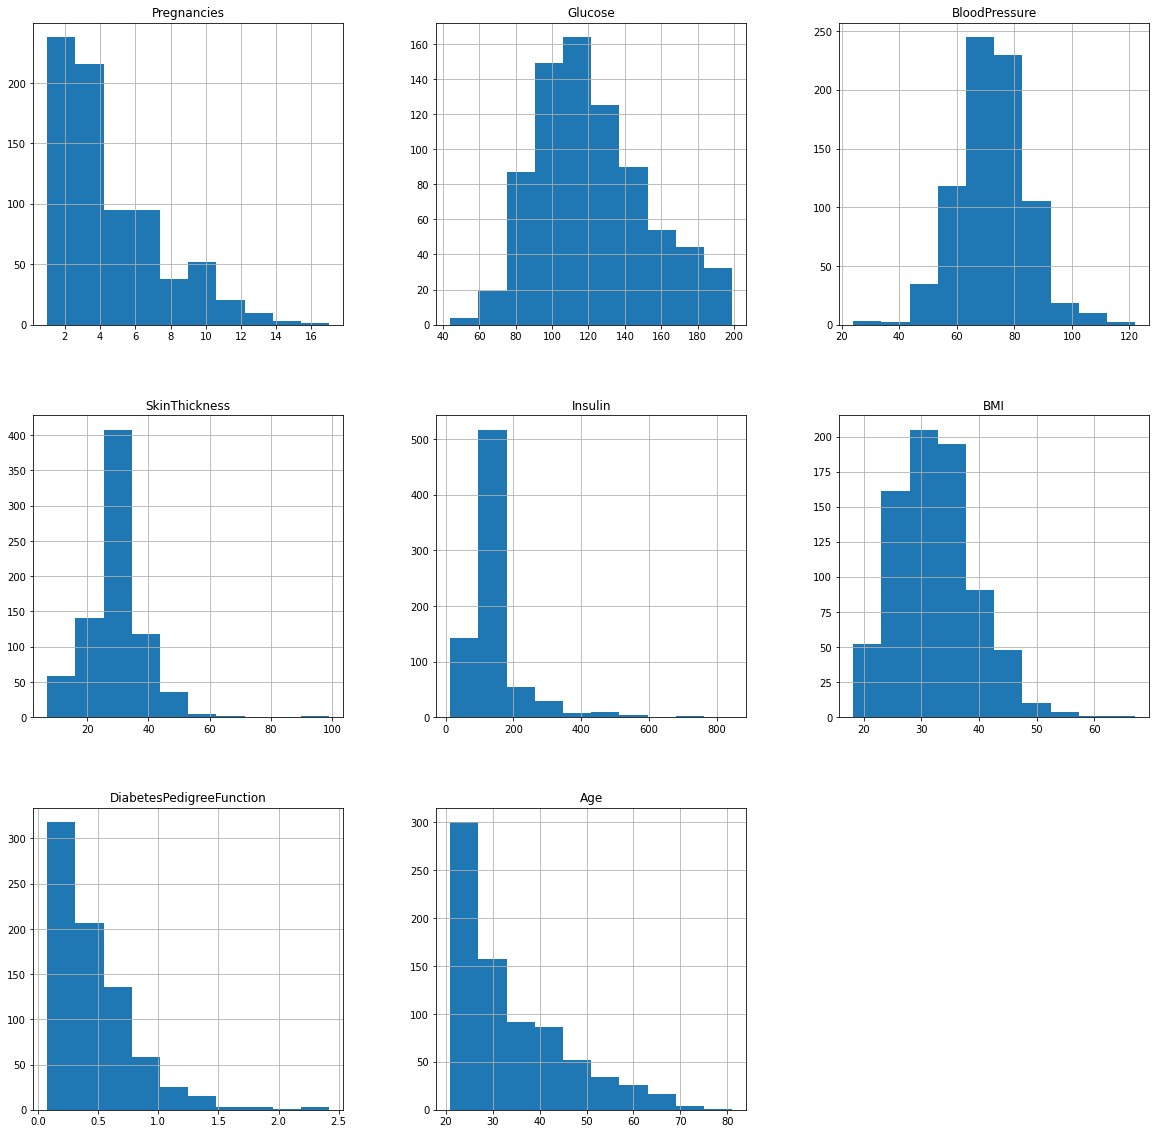

In [23]:
# Final visualisations 
# Basic Histogram
data.iloc[:,0:8].hist(figsize=(20,20))
plt.show() 

<Figure size 1440x576 with 0 Axes>

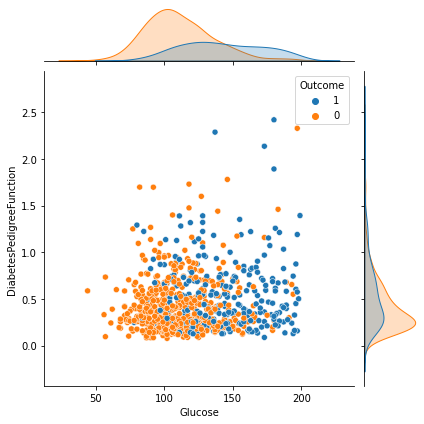

In [52]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="Glucose",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=data)
plt.show()

<Figure size 1440x576 with 0 Axes>

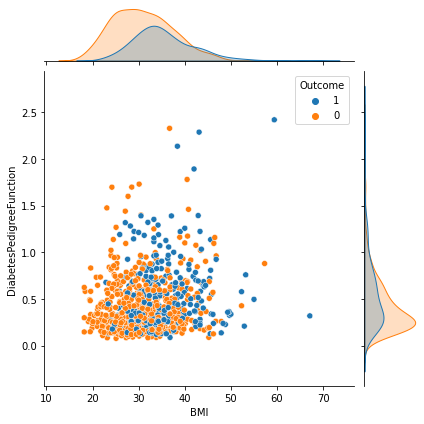

In [53]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="BMI",y="DiabetesPedigreeFunction", color="#4CB391",hue="Outcome",data=data)
plt.show()

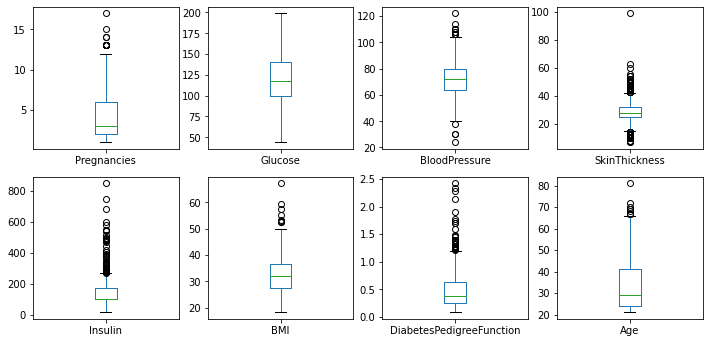

In [58]:
#boxplot
data.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12));



In [36]:
# Dependent and Independent Variables seperartion
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
x = data.drop("Outcome",axis=1)
y = data["Outcome"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [37]:
# Model 1 which is DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)
y1_pred = DTC.predict(x_test)
print("The accuracy of DecisionTreeClassifier model is", accuracy_score(y_test,y1_pred))
print("MSE is: ", mean_squared_error(y_test,y1_pred))
print("R2 SCORE: ",r2_score(y_test,y1_pred))



The accuracy of DecisionTreeClassifier model is 0.8116883116883117
MSE is:  0.18831168831168832
R2 SCORE:  0.1797979797979795


In [38]:
# Model 2 Which is RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(random_state=42,verbose=False).fit(x_train,y_train)
y3_pred=RFC.predict(x_test)
print("The accuracy of RandomForestClassifier model is", accuracy_score(y_test,y3_pred))
print(mean_squared_error(y_test,y3_pred))
print(r2_score(y_test,y3_pred))


The accuracy of RandomForestClassifier model is 0.8896103896103896
0.11038961038961038
0.519191919191919


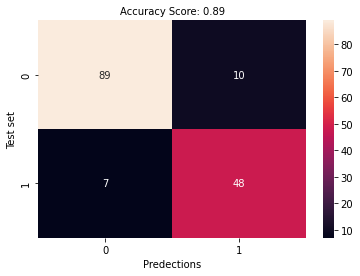

In [39]:
#Creating the Confusion matrix  
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y, y3_pred):
    acc = round(accuracy_score(y, y3_pred), 2)
    cm = confusion_matrix(y, y3_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('Predections')
    plt.ylabel('Test set')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()
plot_confusion_matrix(y_test, y3_pred)

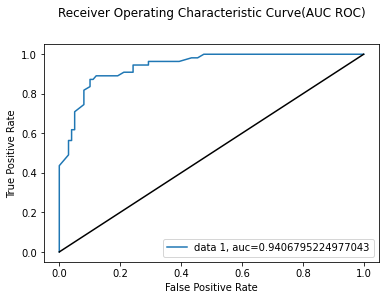

In [40]:
# Generating ROC AOC Curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import metrics

y_pred_proba = RFC.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],c='k')
plt.title('Receiver Operating Characteristic Curve(AUC ROC)', y=1.1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

<function matplotlib.pyplot.show>

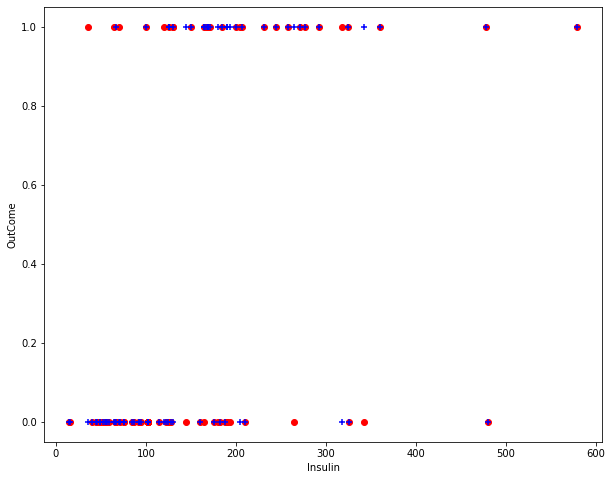

In [41]:
# Scatter Plot
data_n=x_test
data_n
ss=data_n['Insulin']
ss
plt.figure(figsize=(10, 8))
plt.xlabel('Insulin')
plt.ylabel('OutCome')
plt.scatter(ss,y_test,color='r', label='Actual Test Values')
plt.scatter(ss,y3_pred,color='b',label='Predicted Test Values', marker='+')
plt.show

[Text(161.82, 244.62, 'Glucose <= 144.5\ngini = 0.457\nsamples = 481\nvalue = [497, 271]\nclass = 1'),
 Text(89.28, 190.26000000000002, 'Insulin <= 153.5\ngini = 0.374\nsamples = 374\nvalue = [452, 150]\nclass = 1'),
 Text(44.64, 135.9, 'Glucose <= 128.5\ngini = 0.148\nsamples = 268\nvalue = [400, 35]\nclass = 1'),
 Text(22.32, 81.54000000000002, 'Insulin <= 113.5\ngini = 0.091\nsamples = 228\nvalue = [357, 18]\nclass = 1'),
 Text(11.16, 27.180000000000007, 'gini = 0.059\nsamples = 207\nvalue = [320, 10]\nclass = 1'),
 Text(33.480000000000004, 27.180000000000007, 'gini = 0.292\nsamples = 21\nvalue = [37, 8]\nclass = 1'),
 Text(66.96000000000001, 81.54000000000002, 'Glucose <= 136.5\ngini = 0.406\nsamples = 40\nvalue = [43, 17]\nclass = 1'),
 Text(55.8, 27.180000000000007, 'gini = 0.491\nsamples = 20\nvalue = [17, 13]\nclass = 1'),
 Text(78.12, 27.180000000000007, 'gini = 0.231\nsamples = 20\nvalue = [26, 4]\nclass = 1'),
 Text(133.92000000000002, 135.9, 'Age <= 28.5\ngini = 0.429\nsamp

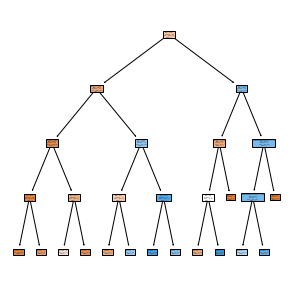

In [51]:
# Tree garph for single tree in random forest classifier
# Selecting one tree for purpose of graph

from sklearn.ensemble import RandomForestClassifier
tryy=RandomForestClassifier(max_depth=4,n_estimators=10)
tryy.fit(x,y)

estimator = tryy.estimators_[6]


data['Outcome']= data['Outcome'].astype(str)
# Visualization of Tree
fn = data.columns[0:8]
cn = data["Outcome"].unique().tolist()

# Also Generating Above Same Tree using Matplotlib,plot_tree for Verification
import matplotlib.pyplot as plt
from sklearn import tree
#fig, axes =plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=1000)
plt.figure(figsize=(5,5))
tree.plot_tree(estimator, feature_names=fn, class_names =cn, filled =True)





In [40]:
# A DNN Model
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)
train, val = train_test_split(train, test_size=0.25, random_state=0)

train_labels = train.iloc[:,-1]
train_data = train.iloc[:,0:-1]
val_labels = val.iloc[:,-1]
val_data = val.iloc[:,0:-1]
test_labels = test.iloc[:,-1]
test_data = test.iloc[:,0:-1]



In [41]:
model = keras.models.Sequential(
[keras.layers.Flatten(input_shape=[8]),
keras.layers.Dense(80, activation="relu"),
keras.layers.Dense(40, activation="relu"),
keras.layers.Dense(2, activation="sigmoid")
])

In [42]:
model.compile(
loss="sparse_categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate = 0.002),
metrics=["accuracy"])

In [43]:
history = model.fit(train_data, train_labels, epochs=100, validation_data=(val_data, val_labels), verbose=2)

Epoch 1/100
15/15 - 1s - loss: 2.3636 - accuracy: 0.5043 - val_loss: 1.3744 - val_accuracy: 0.6299 - 620ms/epoch - 41ms/step
Epoch 2/100
15/15 - 0s - loss: 0.9465 - accuracy: 0.6978 - val_loss: 0.8119 - val_accuracy: 0.6818 - 44ms/epoch - 3ms/step
Epoch 3/100
15/15 - 0s - loss: 0.6593 - accuracy: 0.7304 - val_loss: 0.8293 - val_accuracy: 0.6558 - 46ms/epoch - 3ms/step
Epoch 4/100
15/15 - 0s - loss: 0.9070 - accuracy: 0.6848 - val_loss: 1.4861 - val_accuracy: 0.5325 - 62ms/epoch - 4ms/step
Epoch 5/100
15/15 - 0s - loss: 0.7444 - accuracy: 0.7087 - val_loss: 0.6053 - val_accuracy: 0.7468 - 54ms/epoch - 4ms/step
Epoch 6/100
15/15 - 0s - loss: 0.8148 - accuracy: 0.7109 - val_loss: 0.7573 - val_accuracy: 0.6753 - 50ms/epoch - 3ms/step
Epoch 7/100
15/15 - 0s - loss: 0.6251 - accuracy: 0.7413 - val_loss: 0.7408 - val_accuracy: 0.6623 - 58ms/epoch - 4ms/step
Epoch 8/100
15/15 - 0s - loss: 0.5263 - accuracy: 0.7696 - val_loss: 0.5279 - val_accuracy: 0.8052 - 53ms/epoch - 4ms/step
Epoch 9/100
15

In [36]:
# To evaluate the MSE Score using same data
model_test = keras.models.Sequential(
[keras.layers.Flatten(input_shape=[8]),
keras.layers.Dense(80, activation="relu"),
keras.layers.Dense(40, activation="relu"),
keras.layers.Dense(2, activation="sigmoid")
])

model_test.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])
history = model_test.fit(train_data, train_labels, epochs=100, validation_data=(val_data, val_labels), verbose=2)


Epoch 1/100
15/15 - 1s - loss: 0.3109 - mean_squared_error: 0.3109 - val_loss: 0.3003 - val_mean_squared_error: 0.3003 - 625ms/epoch - 42ms/step
Epoch 2/100
15/15 - 0s - loss: 0.2791 - mean_squared_error: 0.2791 - val_loss: 0.2930 - val_mean_squared_error: 0.2930 - 46ms/epoch - 3ms/step
Epoch 3/100
15/15 - 0s - loss: 0.2781 - mean_squared_error: 0.2781 - val_loss: 0.2968 - val_mean_squared_error: 0.2968 - 55ms/epoch - 4ms/step
Epoch 4/100
15/15 - 0s - loss: 0.2758 - mean_squared_error: 0.2758 - val_loss: 0.3651 - val_mean_squared_error: 0.3651 - 75ms/epoch - 5ms/step
Epoch 5/100
15/15 - 0s - loss: 0.2778 - mean_squared_error: 0.2778 - val_loss: 0.2970 - val_mean_squared_error: 0.2970 - 65ms/epoch - 4ms/step
Epoch 6/100
15/15 - 0s - loss: 0.2775 - mean_squared_error: 0.2775 - val_loss: 0.3216 - val_mean_squared_error: 0.3216 - 66ms/epoch - 4ms/step
Epoch 7/100
15/15 - 0s - loss: 0.2761 - mean_squared_error: 0.2761 - val_loss: 0.2967 - val_mean_squared_error: 0.2967 - 53ms/epoch - 4ms/st

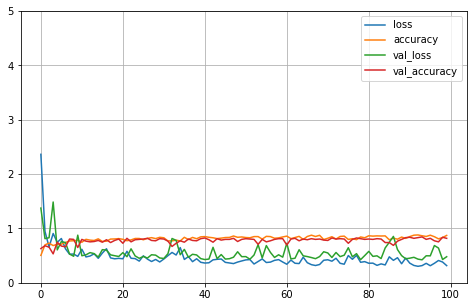

In [44]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 5)
plt.show()

In [45]:
score = model.evaluate(test_data, test_labels)



5/5 [==============================] - 0s 3ms/step - loss: 0.3702 - accuracy: 0.8506


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 80)                720       
                                                                 
 dense_10 (Dense)            (None, 40)                3240      
                                                                 
 dense_11 (Dense)            (None, 2)                 82        
                                                                 
Total params: 4,042
Trainable params: 4,042
Non-trainable params: 0
_________________________________________________________________


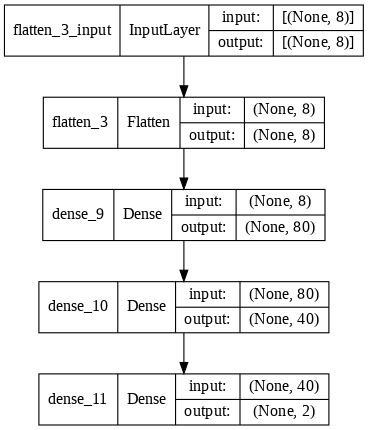

In [46]:
import tensorflow as tf
model.summary()
tf.keras.utils.plot_model(
    model, to_file='fd.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=80
)